In [706]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [713]:
def bootstrap_std_dev(df):
    bootstrapped = df.sample(n=len(df), replace=True) #sample with replacement
    return bootstrapped.std()

def bootstrap_mean(df):
    bootstrapped = df.sample(n=len(df), replace=True) #sample with replacement
    return bootstrapped.mean()



c="all"
# df = pd.read_parquet(f"parquets/ope_estimates_c_in_{c}_good_policy")
# df_no_outliers = pd.read_parquet(f"parquets/ope_estimates_c_in_{c}_no_outliers_good_policy")
# df_bad = pd.read_parquet(f"parquets/ope_estimates_c_in_{c}_bad_policy")
# df_no_outliers_bad = pd.read_parquet(f"parquets/ope_estimates_c_in_{c}_no_outliers_bad_policy")

df = pd.read_parquet(f"parquets/policy_experiments/ope_estimates_good_policy")
df_no_outliers = pd.read_parquet(f"parquets/policy_experiments/ope_estimates_good_policy_no_outliers")
df_bad = pd.read_parquet(f"parquets/policy_experiments/ope_estimates_bad_policy")
df_no_outliers_bad = pd.read_parquet(f"parquets/policy_experiments/ope_estimates_bad_policy_no_outliers")


# df = pd.read_parquet(f"parquets/coverage_experiments/ope_estimates_good_coverage")
# df_no_outliers = pd.read_parquet(f"parquets/coverage_experiments/ope_estimates_good_coverage_no_outliers")
# df_bad = pd.read_parquet(f"parquets/coverage_experiments/ope_estimates_bad_coverage")
# df_no_outliers_bad = pd.read_parquet(f"parquets/coverage_experiments/ope_estimates_bad_coverage")

#---BOOTSTRAP SAMPLING---
df_bootstrapped_std = pd.concat([bootstrap_std_dev(df) for i in range (1000)], axis=1).T.describe()
df_no_outliers_bootstrapped_std = pd.concat([bootstrap_std_dev(df_no_outliers) for i in range (1000)], axis=1).T.describe()
df_bad_bootstrapped_std = pd.concat([bootstrap_std_dev(df_bad) for i in range (1000)], axis=1).T.describe()
df_no_outliers_bad_bootstrapped_std = pd.concat([bootstrap_std_dev(df_no_outliers_bad) for i in range (1000)], axis=1).T.describe()

df_bootstrapped_mean = pd.concat([bootstrap_mean(df) for i in range (1000)], axis=1).T.describe()
df_no_outliers_bootstrapped_mean= pd.concat([bootstrap_mean(df_no_outliers) for i in range (1000)], axis=1).T.describe()
df_bad_bootstrapped_mean = pd.concat([bootstrap_mean(df_bad) for i in range (1000)], axis=1).T.describe()
df_no_outliers_bad_bootstrapped_mean = pd.concat([bootstrap_mean(df_no_outliers_bad) for i in range (1000)], axis=1).T.describe()

on_policy = -337
on_policy_bad_coverage = -365

df_stats = df.describe()
df_no_outliers_stats = df_no_outliers.describe()
df_stats_bad = df_bad.describe()
df_no_outliers_stats_bad = df_no_outliers_bad.describe()

print(df_stats)
print(df_no_outliers_stats)
print(df_bootstrapped_std)
print(df_bootstrapped_std.loc["std"].filter(like="vanilla"))

x = np.array([100, 300, 500, 700, 900])
concepts_color = "limegreen"
concepts_color_bad = "forestgreen"
vanilla_color = "lightsalmon"
vanilla_color_bad = "saddlebrown"

pdis_label="PDIS good policy"
cpdis_label="CPDIS good policy"
pdis_label_2="PDIS bad policy"
cpdis_label_2="CPDIS bad policy"

       100_vanilla  100_concepts  300_vanilla  300_concepts  500_vanilla  \
count    50.000000     50.000000    50.000000     50.000000    50.000000   
mean   -322.946498   -295.308352  -373.975095   -300.638877  -374.968629   
std      89.767926     20.232869    68.009334     13.966433   175.823567   
min    -733.513994   -351.205609  -603.919858   -379.410090 -1358.779742   
25%    -328.035833   -309.002893  -406.671731   -302.325315  -355.706289   
50%    -294.817805   -289.754807  -358.107392   -297.794426  -326.593446   
75%    -273.945407   -281.847917  -328.666891   -293.969549  -312.324452   
max    -241.824786   -253.575567  -287.605769   -286.603342  -294.600931   

       500_concepts  700_vanilla  700_concepts  850_vanilla  850_concepts  
count     50.000000    50.000000     50.000000    50.000000     50.000000  
mean    -298.403299  -342.565817   -292.133045  -330.572234   -294.209967  
std        8.666877    63.114397      5.104726    34.954292      6.554827  
min     -33

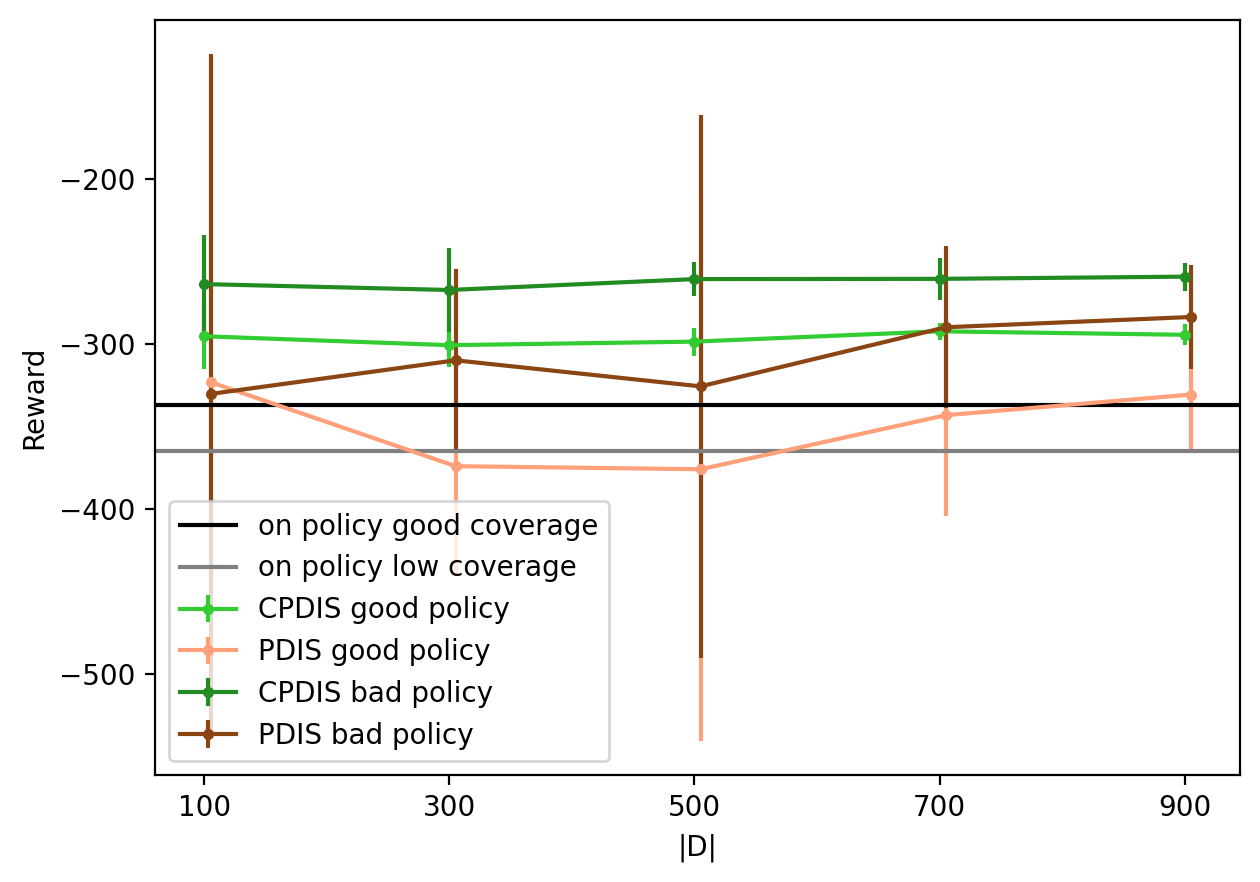

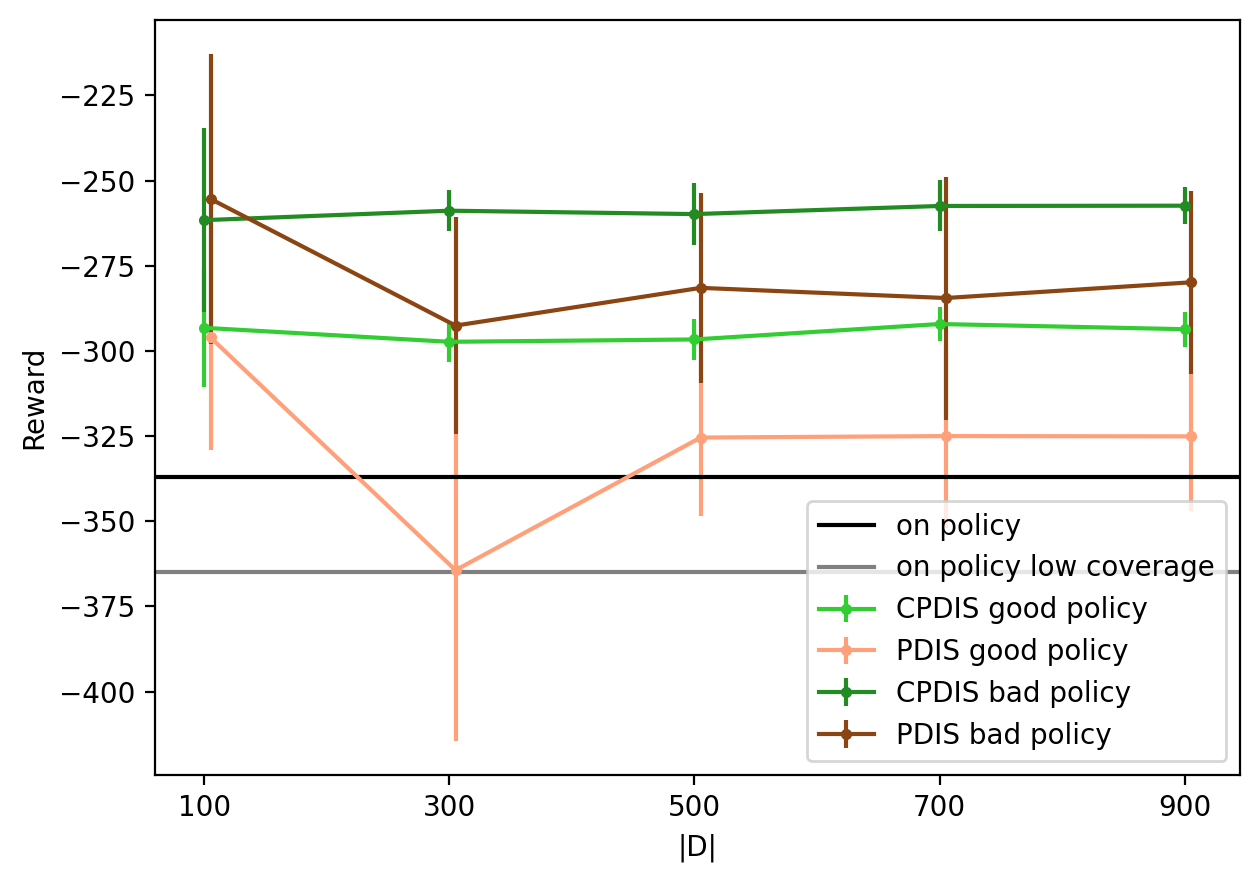

In [720]:
mean_estimates_vanilla = df_bootstrapped_mean.loc["mean"].filter(like="vanilla")
mean_estimates_concepts = df_bootstrapped_mean.loc["mean"].filter(like="concepts")
std_vanilla = df_bootstrapped_std.loc["mean"].filter(like="vanilla")
std_concepts = df_bootstrapped_std.loc["mean"].filter(like="concepts")


mean_estimates_vanilla_bad = df_bad_bootstrapped_mean.loc["mean"].filter(like="vanilla")
mean_estimates_concepts_bad = df_bad_bootstrapped_mean.loc["mean"].filter(like="concepts")
std_vanilla_bad = df_bad_bootstrapped_std.loc["mean"].filter(like="vanilla")
std_concepts_bad = df_bad_bootstrapped_std.loc["mean"].filter(like="concepts")

mean_estimates_vanilla_no_outliers = df_no_outliers_bootstrapped_mean.loc["mean"].filter(like="vanilla")
mean_estimates_concepts_no_outliers = df_no_outliers_bootstrapped_mean.loc["mean"].filter(like="concepts")
std_vanilla_no_outliers = df_no_outliers_bootstrapped_std.loc["mean"].filter(like="vanilla")
std_concepts_no_outliers = df_no_outliers_bootstrapped_std.loc["mean"].filter(like="concepts")

mean_estimates_vanilla_no_outliers_bad = df_no_outliers_bad_bootstrapped_mean.loc["mean"].filter(like="vanilla")
mean_estimates_concepts_no_outliers_bad = df_no_outliers_bad_bootstrapped_mean.loc["mean"].filter(like="concepts")
std_vanilla_no_outliers_bad = df_no_outliers_bad_bootstrapped_std.loc["mean"].filter(like="vanilla")
std_concepts_no_outliers_bad = df_no_outliers_bad_bootstrapped_std.loc["mean"].filter(like="concepts")


fig = plt.figure(figsize=(7,5), dpi=200)
# plt.subplot(1,2,1)

plt.errorbar(x, mean_estimates_concepts.to_list() , yerr=std_concepts.to_list(), label=cpdis_label, color=concepts_color, marker=".")
plt.errorbar(x+5, mean_estimates_vanilla.to_list() , yerr=std_vanilla.to_list(), label=pdis_label, color=vanilla_color, marker=".")
plt.errorbar(x, mean_estimates_concepts_bad.to_list() , yerr=std_concepts_bad.to_list(), label=cpdis_label_2, color=concepts_color_bad, marker=".")
plt.errorbar(x+5, mean_estimates_vanilla_bad.to_list() , yerr=std_vanilla_bad.to_list(), label=pdis_label_2, color=vanilla_color_bad, marker=".")
plt.axhline(on_policy, label="on policy good coverage", color="black")
plt.axhline(on_policy_bad_coverage, label="on policy low coverage", color="grey")
plt.legend()
plt.ylabel("Reward")
plt.xlabel("|D|")
plt.xticks(x)

fig = plt.figure(figsize=(7,5), dpi=200)
# plt.subplot(1,2,2)
plt.errorbar(x, mean_estimates_concepts_no_outliers.to_list() , yerr=std_concepts_no_outliers.to_list(), label=cpdis_label, color=concepts_color, marker=".")
plt.errorbar(x+5, mean_estimates_vanilla_no_outliers.to_list() , yerr=std_vanilla_no_outliers.to_list(), label=pdis_label, color=vanilla_color, marker=".")
plt.errorbar(x, mean_estimates_concepts_no_outliers_bad.to_list() , yerr=std_concepts_no_outliers_bad.to_list(), label=cpdis_label_2, color=concepts_color_bad, marker=".")
plt.errorbar(x+5, mean_estimates_vanilla_no_outliers_bad.to_list() , yerr=std_vanilla_no_outliers_bad.to_list(), label=pdis_label_2, color=vanilla_color_bad, marker=".")
plt.axhline(on_policy, label="on policy", color="black")
plt.axhline(on_policy_bad_coverage, label="on policy low coverage", color="grey")
plt.xlabel("|D|")
plt.xticks(x)


plt.ylabel("Reward")
plt.legend()
plt.show()

## Bias Plots

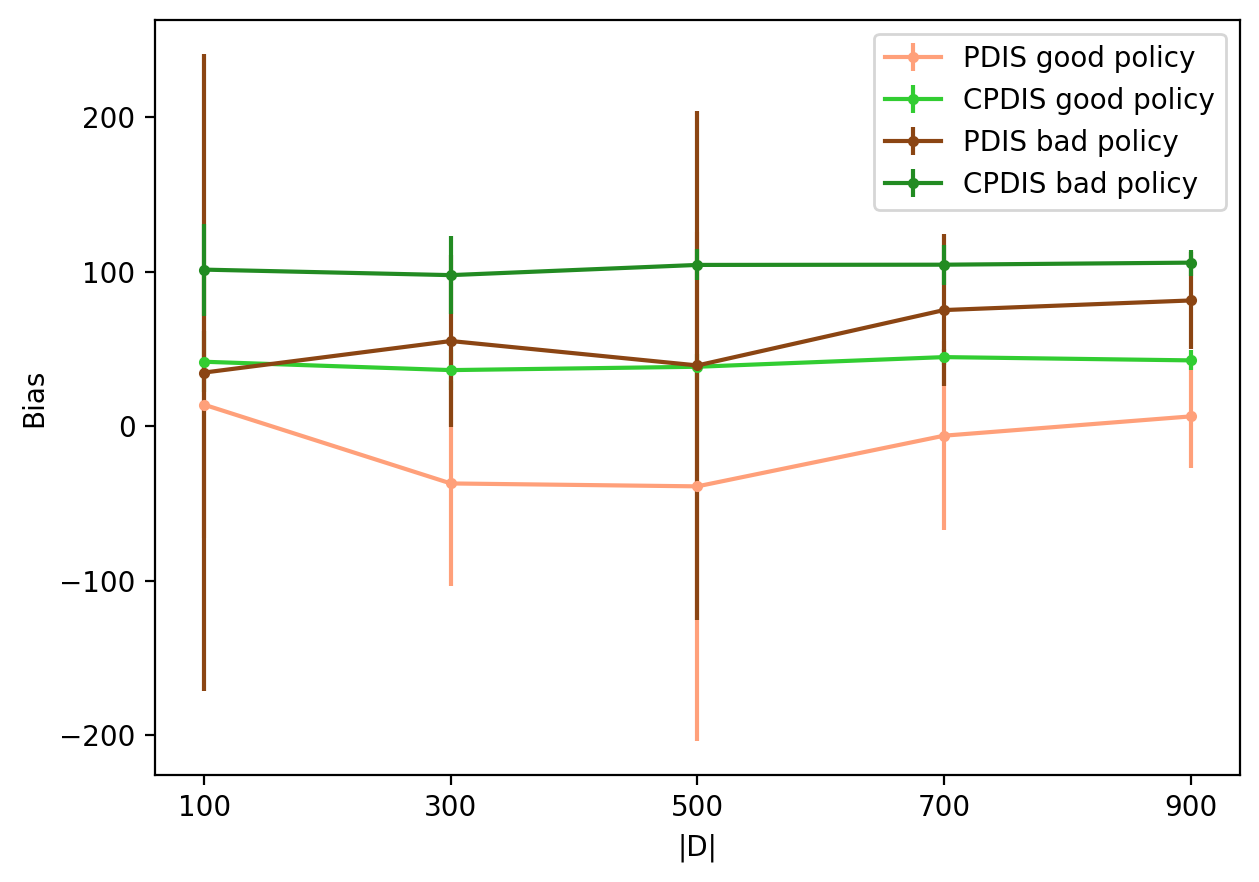

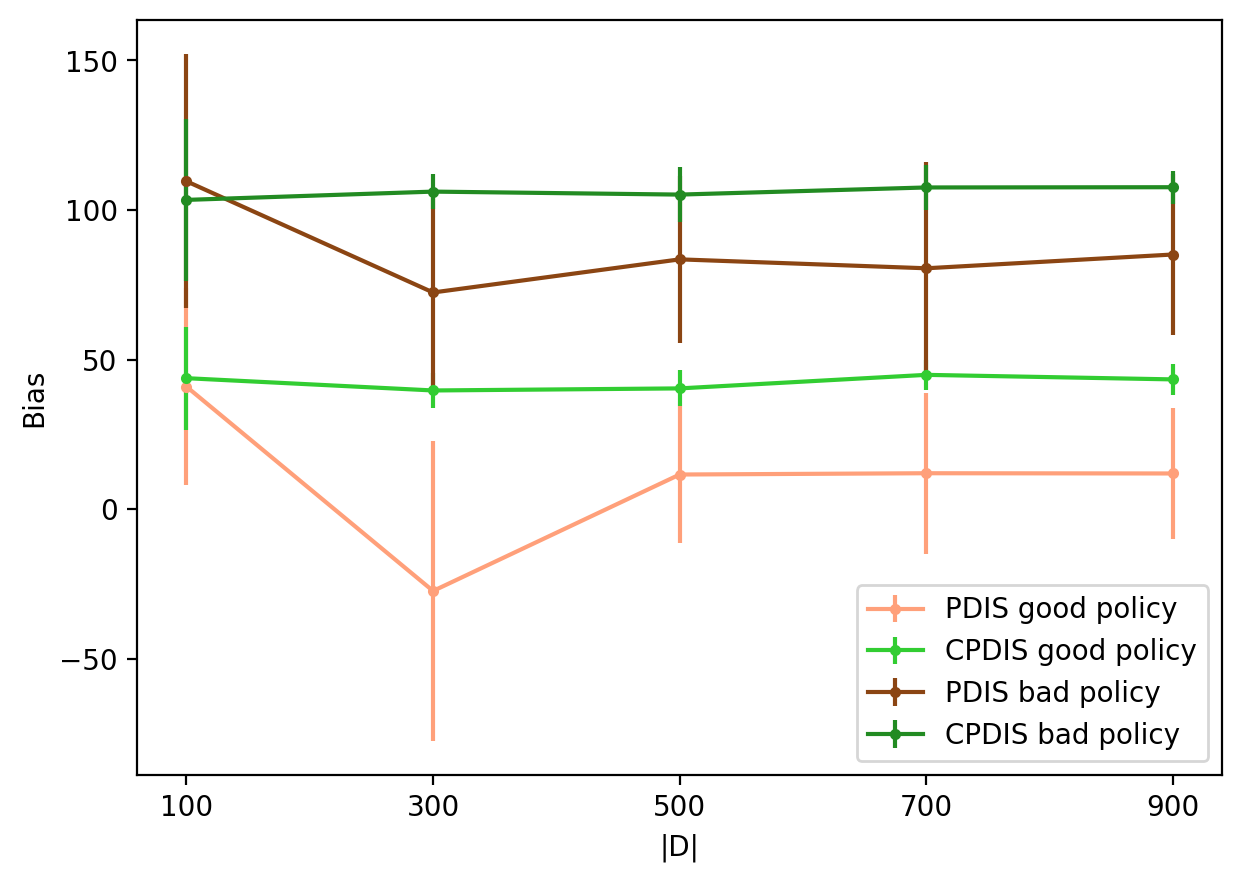

In [724]:

bias_vanilla = mean_estimates_vanilla - on_policy
bias_concepts = mean_estimates_concepts - on_policy
bias_vanilla_no_outliers = mean_estimates_vanilla_no_outliers - on_policy
bias_concepts_no_outliers = mean_estimates_concepts_no_outliers - on_policy

bias_vanilla_bad = mean_estimates_vanilla_bad - on_policy_bad_coverage
bias_concepts_bad = mean_estimates_concepts_bad - on_policy_bad_coverage
bias_vanilla_no_outliers_bad = mean_estimates_vanilla_no_outliers_bad - on_policy_bad_coverage
bias_concepts_no_outliers_bad = mean_estimates_concepts_no_outliers_bad - on_policy_bad_coverage



fig = plt.figure(figsize=(7,5), dpi=200)
# plt.subplot(1,2,1)
plt.errorbar(x, bias_vanilla, label=pdis_label, yerr=std_vanilla.to_list(), color=vanilla_color, marker=".")
plt.errorbar(x, bias_concepts, label=cpdis_label, yerr=std_concepts.to_list(), color=concepts_color, marker=".")
plt.errorbar(x, bias_vanilla_bad, label=pdis_label_2, yerr=std_vanilla_bad.to_list(), color=vanilla_color_bad, marker=".")
plt.errorbar(x, bias_concepts_bad, label=cpdis_label_2, yerr=std_concepts_bad.to_list(), color=concepts_color_bad, marker=".")
plt.xlabel("|D|")
plt.ylabel("Bias") 
plt.xticks(x)
plt.legend()

fig = plt.figure(figsize=(7,5), dpi=200)
# plt.subplot(1,2,2)
plt.errorbar(x, bias_vanilla_no_outliers, yerr=std_vanilla_no_outliers.to_list(), label=pdis_label, color=vanilla_color, marker=".")
plt.errorbar(x, bias_concepts_no_outliers, yerr=std_concepts_no_outliers.to_list(), label=cpdis_label, color=concepts_color, marker=".")
plt.errorbar(x, bias_vanilla_no_outliers_bad, yerr=std_vanilla_no_outliers_bad.to_list(), label=pdis_label_2, color=vanilla_color_bad, marker=".")
plt.errorbar(x, bias_concepts_no_outliers_bad, yerr=std_concepts_no_outliers_bad.to_list(), label=cpdis_label_2, color=concepts_color_bad, marker=".")
plt.ylabel("Bias")
plt.xlabel("|D|")
plt.xticks(x)

plt.legend()
plt.show()


## Variance Plots

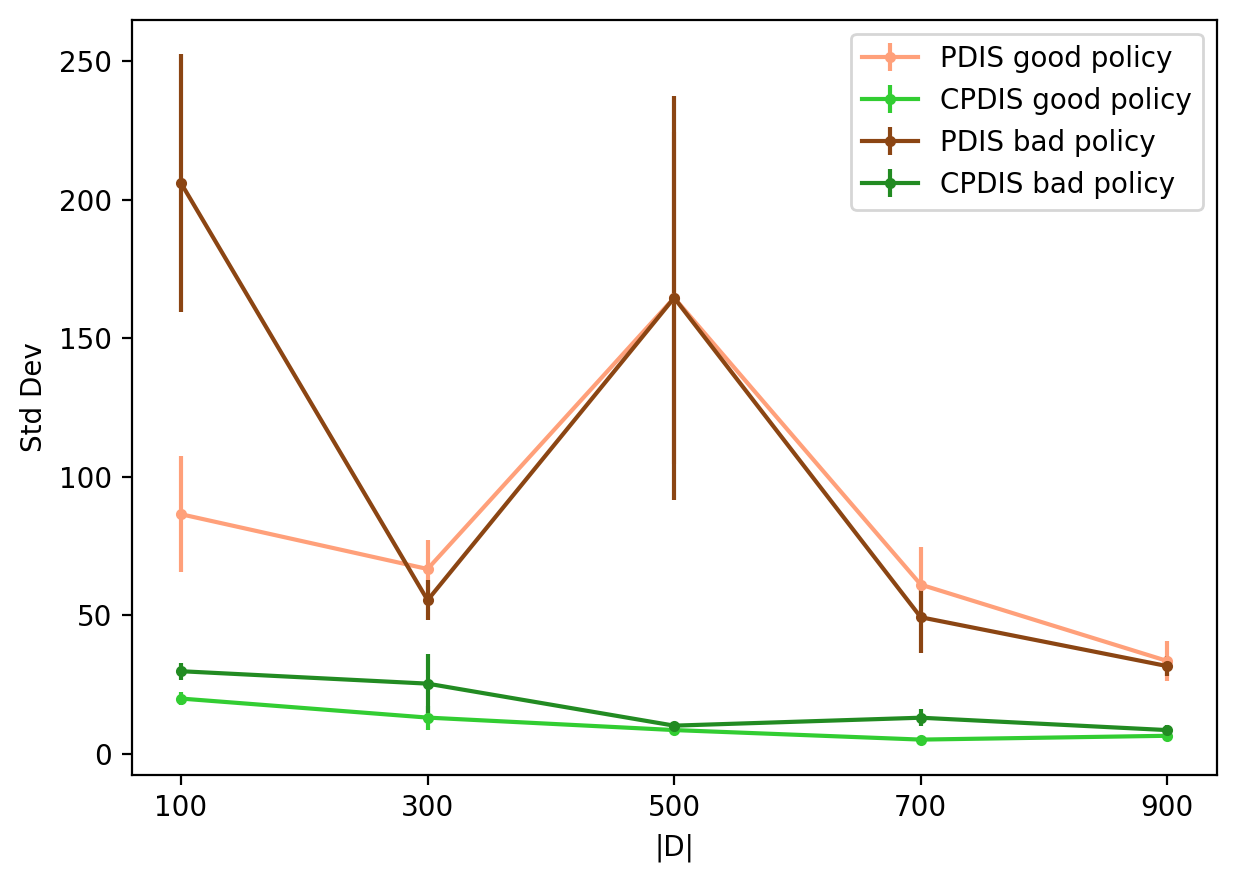

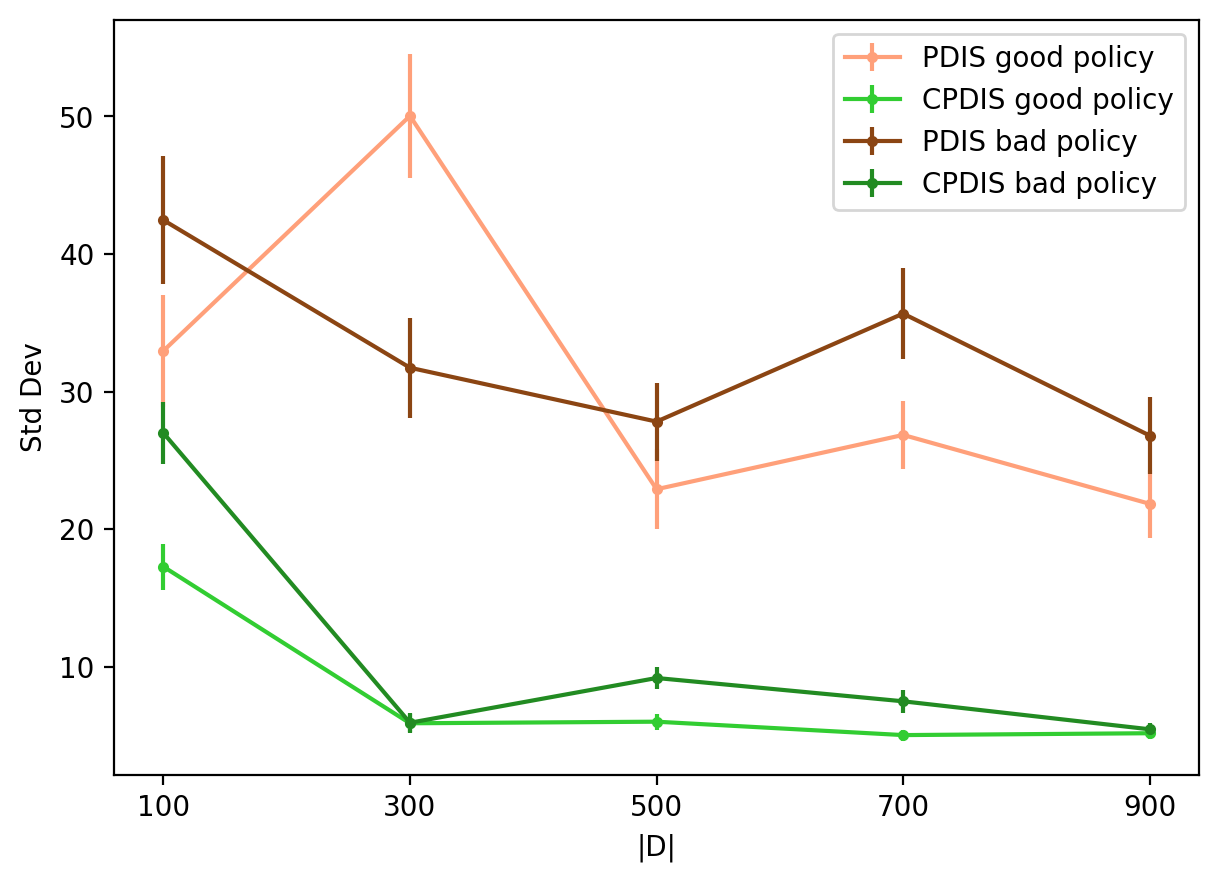

In [722]:
var_vanilla = std_vanilla**2
var_concepts = std_concepts**2
var_vanilla_no_outliers = std_vanilla_no_outliers**2
var_concepts_no_outliers = std_concepts_no_outliers**2
var_vanilla_bad = std_vanilla_bad**2
var_concepts_bad = std_concepts_bad**2
var_vanilla_no_outliers_bad = std_vanilla_no_outliers_bad**2
var_concepts_no_outliers_bad = std_concepts_no_outliers_bad**2

#Error bars of standard deviation from bootstrap sampling
err_vanilla = df_bootstrapped_std.loc["std"].filter(like="vanilla")
err_concepts = df_bootstrapped_std.loc["std"].filter(like="concepts")
err_vanilla_no_outliers = df_no_outliers_bootstrapped_std.loc["std"].filter(like="vanilla")
err_concepts_no_outliers = df_no_outliers_bootstrapped_std.loc["std"].filter(like="concepts")
err_vanilla_bad = df_bad_bootstrapped_std.loc["std"].filter(like="vanilla")
err_concepts_bad = df_bad_bootstrapped_std.loc["std"].filter(like="concepts")
err_vanilla_no_outliers_bad = df_no_outliers_bad_bootstrapped_std.loc["std"].filter(like="vanilla")
err_concepts_no_outliers_bad = df_no_outliers_bad_bootstrapped_std.loc["std"].filter(like="concepts")


fig = plt.figure(figsize=(7,5), dpi=200)
# plt.subplot(1,2,1)

plt.errorbar(x, std_vanilla, yerr=err_vanilla.to_list(), label=pdis_label, color=vanilla_color, marker=".")
plt.errorbar(x, std_concepts, yerr=err_concepts.to_list(), label=cpdis_label, color=concepts_color, marker=".")
plt.errorbar(x, std_vanilla_bad, yerr=err_vanilla_bad.to_list(), label=pdis_label_2, color=vanilla_color_bad,  marker=".")
plt.errorbar(x, std_concepts_bad, yerr=err_concepts_bad.to_list(), label=cpdis_label_2, color=concepts_color_bad,  marker=".")
plt.xlabel("|D|")
plt.ylabel("Std Dev")
plt.legend()
plt.xticks(x)

fig = plt.figure(figsize=(7,5), dpi=200)
# plt.subplot(1,2,2)
plt.errorbar(x, std_vanilla_no_outliers, yerr=err_vanilla_no_outliers.to_list(), label=pdis_label, color=vanilla_color, marker=".")
plt.errorbar(x, std_concepts_no_outliers, yerr=err_concepts_no_outliers.to_list(), label=cpdis_label, color=concepts_color, marker=".")
plt.errorbar(x, std_vanilla_no_outliers_bad, yerr=err_vanilla_no_outliers_bad.to_list(), label=pdis_label_2, color=vanilla_color_bad,  marker=".")
plt.errorbar(x, std_concepts_no_outliers_bad, yerr=err_concepts_no_outliers_bad.to_list(), label=cpdis_label_2, color=concepts_color_bad,  marker=".")
plt.xlabel("|D|")
plt.ylabel("Std Dev")
plt.xticks(x)


plt.legend()
plt.show()


## MSE Plots

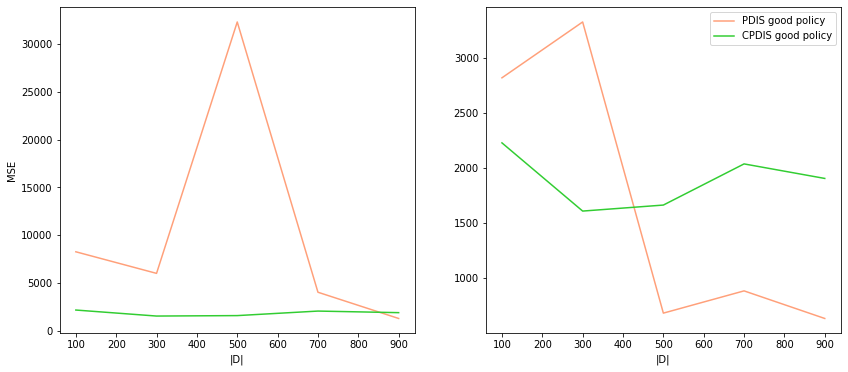

In [711]:
mse_vanilla = var_vanilla + bias_vanilla**2
mse_concepts = var_concepts + bias_concepts**2
mse_vanilla_no_outliers = var_vanilla_no_outliers + bias_vanilla_no_outliers**2
mse_concepts_no_outliers = var_concepts_no_outliers + bias_concepts_no_outliers**2

fig = plt.figure(figsize=(14,6))
plt.subplot(1,2,1)

plt.plot(x, mse_vanilla, label=pdis_label, color=vanilla_color)
plt.plot(x, mse_concepts, label=cpdis_label, color=concepts_color)
plt.xlabel("|D|")
plt.ylabel("MSE")

plt.subplot(1,2,2)
plt.plot(x, mse_vanilla_no_outliers, label=pdis_label, color=vanilla_color)
plt.plot(x, mse_concepts_no_outliers, label=cpdis_label, color=concepts_color)
plt.xlabel("|D|")


plt.legend()
plt.show()